In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
def mse(array):
    return np.mean(array.flatten() ** 2)

In [ ]:
p = np.array([[1,1,1], 
              [1,2,1], 
              [2,-1,1], 
              [2,0,1], 
              [-1,2,1], 
              [-2,1,1], 
              [-1,-1,1], 
              [-2,-2,1]], dtype='float')

t = np.array([[1,1],
              [1,1],
              [1,0],
              [1,0],
              [0,1],
              [0,1],
              [0,0],
              [0,0]], dtype='float')

weight = np.array([[0,0, 1],
                   [0,0, 1]], dtype='float')

errors = np.zeros([8,2], dtype='float')
mean_squared_error = 1

mse_iterations = []

learning_rate = 0.01
error_threshold = 0.035

In [ ]:
while mean_squared_error > error_threshold:
    for i in range(0, len(p)):
        a = np.dot(weight,p[i])
        e = t[i] - a
        errors[i] = e
        weight[0] = weight[0] + 2 * learning_rate * e[0] * p[i]
        weight[1] = weight[1] + 2 * learning_rate * e[1] * p[i]
    mean_squared_error = mse(errors)
    mse_iterations.append(mean_squared_error)
    print(mean_squared_error)

print(weight)
print("Final MSE: " + str(mse(errors)))

0.2728
0.08414076262400005
0.08557682862780974
0.07805422887530016
0.07861422448624839
0.0785714587189885
0.07857455364283367
0.0785743345113292
0.07857434983511091
0.07857434877093086
0.07857434884454263
0.07857434883946228
0.07857434883981239
0.0785743488397883
0.07857434883978999
0.07857434883978985
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978986
0.07857434883978

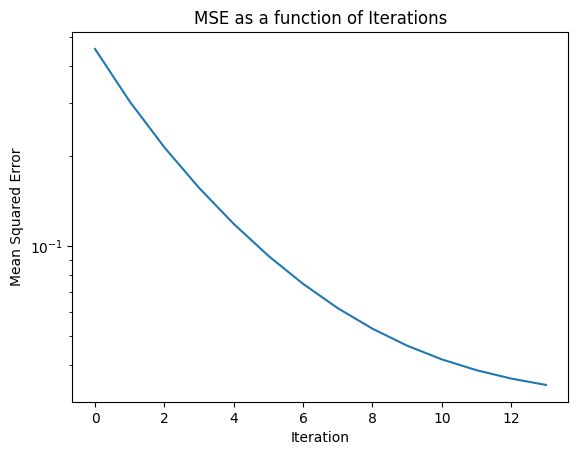

In [ ]:
plt.title("MSE as a function of Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.semilogy(mse_iterations)

In [ ]:
dt = np.dtype([('input', 'U2'), ('t1', 'f8'), ('t2', 'f8'), ('t3', 'f8'), ('t4', 'f8')])
table = np.zeros(len(p), dtype=dt)
for i in range(0, len(p)):
    actual_output = np.dot(weight, p[i])
    
    table[i] = np.array([("p" + str(i+1), mse([1,1] - actual_output), mse([1,0] - actual_output), mse([0,1] - actual_output), mse([0,0] - actual_output))], dtype=dt)

print("  MSE between each output and the 4 classes")
print(pd.DataFrame(table))

  MSE between each output and the 4 classes
  input        t1        t2        t3        t4
0    p1  0.054545  0.260423  0.404271  0.610148
1    p2  0.010322  0.527153  0.367629  0.884460
2    p3  0.506128  0.008617  1.137385  0.639874
3    p4  0.245319  0.058761  0.884156  0.697598
4    p5  0.287069  0.966862  0.050990  0.730784
5    p6  0.542400  0.992721  0.002048  0.452369
6    p7  0.571460  0.318392  0.312639  0.059572
7    p8  1.047776  0.565237  0.484682  0.002143
